In [ ]:
# 한글 패치
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.3 MB/s eta 0:00:00


## **범죄 발생 시간대 및 요일 csv 파일과 범죄자 범행동기 csv 파일 불러오기**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

time = pd.read_csv('/content/drive/MyDrive/Python/경찰청_범죄 발생 시간대 및 요일 1차 수정.csv', encoding='EUC-KR')
motive = pd.read_csv('/content/drive/MyDrive/Python/경찰청_범죄자 범행동기 1차 수정.csv', encoding='EUC-KR')

In [ ]:
time.head()

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
2,강력범죄,강도,105,131,44,59,68,72,81,107,131,111,113,116,105,124,121,108
3,강력범죄,강간강제추행,2485,2806,1710,1456,1625,2017,2614,3620,4097,3449,3449,3449,3449,3449,3449,3449
4,강력범죄,방화,144,151,105,124,109,173,189,228,139,209,181,181,209,170,206,206


In [ ]:
motive.head()

,범죄대분류,범죄중분류,이욕(생활비),이욕(유흥비),이욕(도박비),이욕(허영사치심),이욕(치부),이욕(기타),사행심,보복,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상,합계
0,강력범죄,살인기수,1,6,0,2,5,22,0,0,51,0,0,147,15,2,118,77,446
1,강력범죄,살인미수등,0,0,0,0,2,33,0,0,44,0,1,255,38,3,183,51,610
2,강력범죄,강도,631,439,24,9,7,347,53,1,15,16,37,642,27,16,805,253,3322
3,강력범죄,강간강제추행,62,19,4,1,33,909,22,4,30,1026,974,5868,74,260,4614,4112,18012
4,강력범죄,방화,6,0,0,0,1,69,2,1,97,62,0,547,124,40,339,104,1392


## **데이터 타입 살펴보기**

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   범죄대분류          34 non-null     object
 1   범죄중분류          34 non-null     object
 2   0시00분-02시59분   34 non-null     int64 
 3   03시00분-05시59분  34 non-null     int64 
 4   06시00분-08시59분  34 non-null     int64 
 5   09시00분-11시59분  34 non-null     int64 
 6   12시00분-14시59분  34 non-null     int64 
 7   15시00분-17시59분  34 non-null     int64 
 8   18시00분-20시59분  34 non-null     int64 
 9   21시00분-23시59분  34 non-null     int64 
 10  미상             34 non-null     int64 
 11  일              34 non-null     int64 
 12  월              34 non-null     int64 
 13  화              34 non-null     int64 
 14  수              34 non-null     int64 
 15  목              34 non-null     int64 
 16  금              34 non-null     int64 
 17  토              34 non-null     int64 
dtypes: int64(16), object(2)
memory u

In [ ]:
motive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   범죄대분류      34 non-null     object
 1   범죄중분류      34 non-null     object
 2   이욕(생활비)    34 non-null     int64 
 3   이욕(유흥비)    34 non-null     int64 
 4   이욕(도박비)    34 non-null     int64 
 5   이욕(허영사치심)  34 non-null     int64 
 6   이욕(치부)     34 non-null     int64 
 7   이욕(기타)     34 non-null     int64 
 8   사행심        34 non-null     int64 
 9   보복         34 non-null     int64 
 10  가정불화       34 non-null     int64 
 11  호기심        34 non-null     int64 
 12  유혹         34 non-null     int64 
 13  우발적        34 non-null     int64 
 14  현실불만       34 non-null     int64 
 15  부주의        34 non-null     int64 
 16  기타         34 non-null     int64 
 17  미상         34 non-null     int64 
 18  합계         34 non-null     int64 
dtypes: int64(17), object(2)
memory usage: 5.2+ KB


## **생활비로 인한 가장 많은 범죄는 무엇일까?**

In [ ]:
생활비 = motive.sort_values('이욕(생활비)', ascending=False)[['범죄대분류','범죄중분류','이욕(생활비)']]
생활비.head(10) # 예상한대로 사기나 절도, 강도, 도박 등이 포함되어 있었다.

,범죄대분류,범죄중분류,이욕(생활비)
20,지능범죄,사기,12518
5,절도범죄,절도,12085
25,특별경제범죄,특별경제범죄,5313
27,보건범죄,보건범죄,2723
21,지능범죄,횡령,1370
24,풍속범죄,도박범죄,1005
23,풍속범죄,성풍속범죄,754
11,폭력범죄,폭력행위등,711
2,강력범죄,강도,631
30,노동범죄,노동범죄,513


## **가장 건수가 많은 강력범죄는 무엇일까?**

In [ ]:
강력범죄 = motive.query('범죄대분류 == "강력범죄"')
강력범죄.sort_values('합계', ascending=False)[['범죄중분류', '합계']]

,범죄중분류,합계
3,강간강제추행,18012
2,강도,3322
4,방화,1392
1,살인미수등,610
0,살인기수,446


## **그렇다면, '강간강제추행'의 가장 큰 범행 동기는 무엇일까?**

In [ ]:
범행동기 = motive.query('범죄중분류 == "강간강제추행"')
범행동기

,범죄대분류,범죄중분류,이욕(생활비),이욕(유흥비),이욕(도박비),이욕(허영사치심),이욕(치부),이욕(기타),사행심,보복,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상,합계
3,강력범죄,강간강제추행,62,19,4,1,33,909,22,4,30,1026,974,5868,74,260,4614,4112,18012


In [ ]:
# 열 데이터 내림차순을 위한 작업

# 0번째 행을 Series로 꺼내기
row = 범행동기.iloc[0]

# 불필요한 정보 제외 (범죄대분류, 범죄중분류, 합계)
row_filtered = row.drop(labels=['범죄대분류', '범죄중분류', '합계'])

# 값 기준 내림차순 정렬
내림차순 = row_filtered.sort_values(ascending=False)
print(내림차순)

우발적          5868
기타           4614
미상           4112
호기심          1026
유혹            974
이욕(기타)        909
부주의           260
현실불만           74
이욕(생활비)        62
이욕(치부)         33
가정불화           30
사행심            22
이욕(유흥비)        19
이욕(도박비)         4
보복              4
이욕(허영사치심)       1
Name: 3, dtype: object


<Axes: >

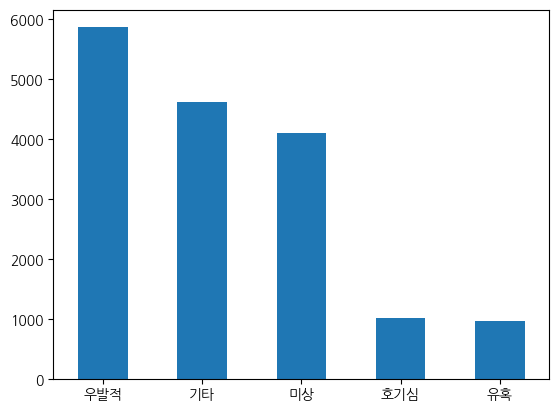

In [ ]:
범행동기 = 내림차순.head().plot(kind='bar')
plt.xticks(rotation=0)
범행동기 # 우발적인 이유가 가장 컸다

## **0시 00분 ~ 02시 59분 사이에 가장 많이 일어나는 범죄 Top10**

In [ ]:
새벽범죄 = time.sort_values('0시00분-02시59분', ascending=False)[['범죄대분류','범죄중분류','0시00분-02시59분']]
새벽범죄.head(10) # 생각보다 강력범죄가 많지않았다. 교통범죄가 이렇게 많이 나는 걸 처음 알았다 ㅠㅠ

,범죄대분류,범죄중분류,0시00분-02시59분
29,교통범죄,교통범죄,24513
7,폭력범죄,폭행,19226
5,절도범죄,절도,13088
20,지능범죄,사기,5443
13,폭력범죄,손괴,5107
6,폭력범죄,상해,4166
21,지능범죄,횡령,2754
3,강력범죄,강간강제추행,2485
25,특별경제범죄,특별경제범죄,1688
9,폭력범죄,협박,1316


## **주말에 가장 많이 일어나는 범죄 Top5**

In [ ]:
time['주말합계'] = time['일'] + time['토'] # 주말 합계 열 추가
주말 = time.sort_values('주말합계', ascending=False)[['범죄중분류','주말합계']].head()
주말

,범죄중분류,주말합계
29,교통범죄,104832
5,절도,54732
7,폭행,52359
20,사기,44938
13,손괴,17995


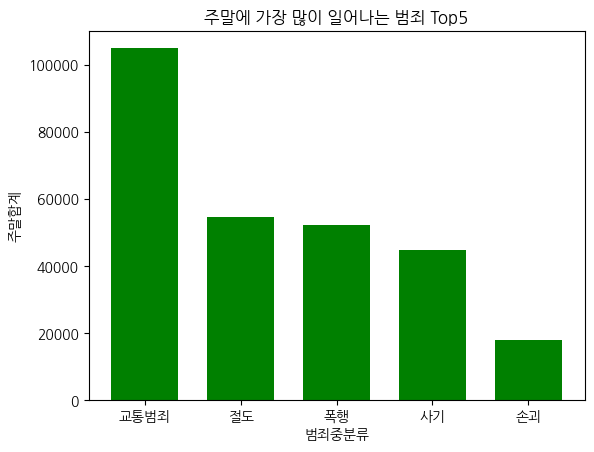

In [ ]:
plt.bar(주말.범죄중분류, 주말.주말합계, width=0.7, color='green')
plt.title('주말에 가장 많이 일어나는 범죄 Top5')
plt.xlabel('범죄중분류')
plt.ylabel('주말합계')
plt.show()

## **평일에 가장 많이 일어나는 범죄 Top5**

In [ ]:
time['평일합계'] = time['월'] + time['화'] + time['수'] + time['목'] + time['금']
평일 = time.sort_values('평일합계', ascending=False)[['범죄중분류','평일합계']].head()
평일

,범죄중분류,평일합계
29,교통범죄,272522
20,사기,259534
5,절도,132225
7,폭행,104838
21,횡령,42782


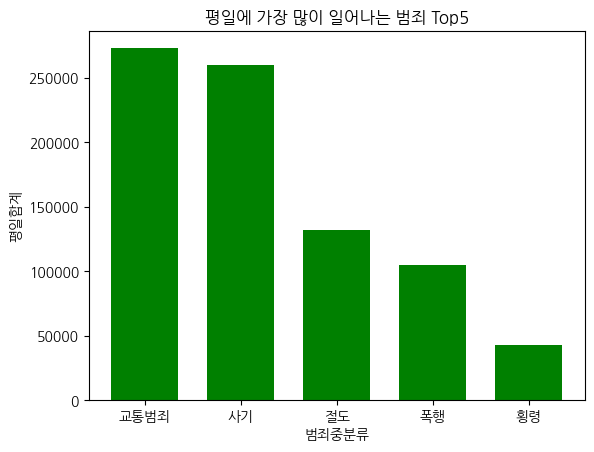

In [ ]:
plt.bar(평일.범죄중분류, 평일.평일합계, width=0.7, color='green')
plt.title('평일에 가장 많이 일어나는 범죄 Top5')
plt.xlabel('범죄중분류')
plt.ylabel('평일합계')
plt.show()

### **평일과 주말 사기 범죄 건수의 차이 결론**

1. 사기 범죄 유형 특성
평일에는 직장인, 회사원들이 업무 중에 인터넷 뱅킹, 카드 결제, 비즈니스 거래 등을 많이 하기 때문에 사기 피해가 더 자주 발생할 수 있음!
특히 금융 사기나 전화 사기 같은 경우 업무시간과 맞물려 증가하는 경향이 있다.

2. 사기 범죄의 접근성
평일에는 사람들이 상대적으로 업무나 일상 생활에서 많은 사람과 접촉하거나 인터넷 활동을 많이 하기 때문에 사기범들이 공격하기 좋은 환경이다.
반면 주말엔 사람들이 휴식하거나 외출해서 온라인/오프라인 활동 패턴이 다르다 보니 사기 건수가 줄어들 가능성이 있다.

3. 신고율 차이
평일에는 경찰서, 금융기관 등 신고 접수가 활발하지만, 주말엔 신고가 늦어지거나 신고 자체가 적을 수도 있기 때문에, 신고율 차이가 날 수 있다.

## **손괴 범죄는 어느 시간대에 가장 많이 일어날까?**

In [ ]:
손괴 = []

for index, row in time.iterrows():  # pandas DataFrame 반복
    if "손괴" in str(row.iloc[1]):  # 두 번째 컬럼(범죄중분류)에서 손괴 찾기
        for i in row.iloc[2:10]:  # 시간대 컬럼들 (2~9번째)
            손괴.append(int(i))
        break

print(손괴)

[5107, 4556, 4014, 5277, 4983, 6289, 9323, 10822]


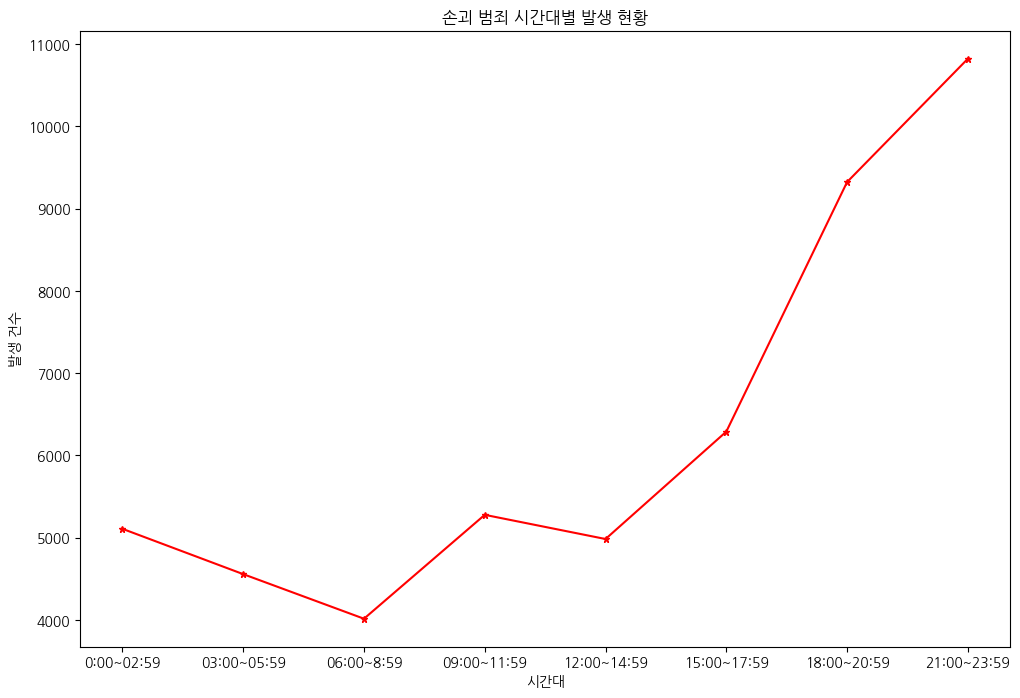

In [ ]:
시간 = ['0:00~02:59', '03:00~05:59', '06:00~8:59', '09:00~11:59', '12:00~14:59', '15:00~17:59', '18:00~20:59', '21:00~23:59']

plt.figure(figsize=(12, 8))
plt.title('손괴 범죄 시간대별 발생 현황')
plt.plot(시간, 손괴, color='red', marker='*', markersize=5)
plt.xlabel('시간대')
plt.ylabel('발생 건수')
plt.show()

시간대별 손괴 범죄 분포

분석 결과, **손괴 범죄는 저녁 시간대(18시~24시)** 에 가장 많이 발생함.

이는 전반적인 범죄 발생 추이와는 다르게, 특정 시간대에 몰리는 뚜렷한 특징을 보인다.


---



**< 추정 원인: 음주와 취객 >**

저녁 시간은 퇴근 후 음주 활동이 활발한 시간대로, 술에 취한 상태에서 기물 파손, 난동 등이 발생할 가능성이 큼.

실제로 ‘손괴’는 충동적, 감정적인 동기가 많기 때문에 술로 인해 자제력이 낮아진 상태와도 밀접한 관련이 있을 수 있음.

정책적 제안

유흥가, 번화가 주변에 순찰 강화 또는 CCTV 확대, 야간 취객 관리 정책이 손괴 범죄 예방에 효과적일 수 있음.

## **가정 불화로 인한 폭력 범죄 건수**

In [ ]:
폭력범죄 = []
가정불화건수 = []

for index, row in motive.iterrows():
    if "폭력범죄" in str(row.iloc[0]):
        범죄명 = row.iloc[1]  # 범죄분류명
        가정불화_수 = int(row.iloc[10])  # 가정불화 컬럼 (10번째)

        폭력범죄.append(범죄명)
        가정불화건수.append(가정불화_수)

print(폭력범죄)
print(가정불화건수)

['상해', '폭행', '체포감금', '협박', '약취유인', '폭력행위등', '공갈', '손괴']
[1666, 1724, 17, 115, 3, 937, 1, 346]


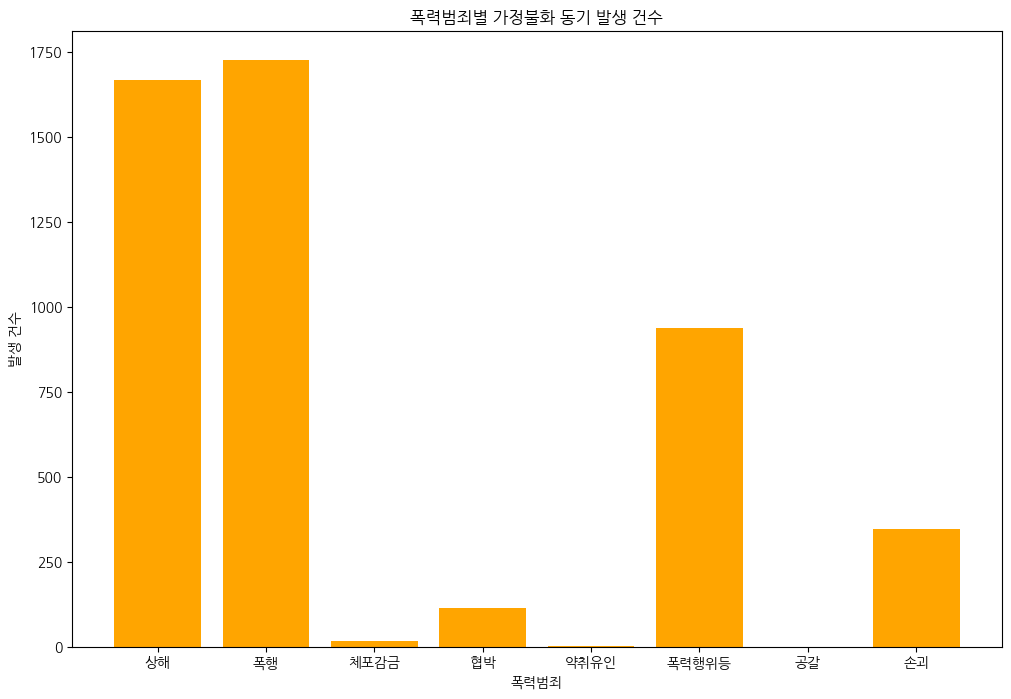

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('폭력범죄별 가정불화 동기 발생 건수')
plt.bar(폭력범죄, 가정불화건수, color='orange')
plt.xlabel('폭력범죄')
plt.ylabel('발생 건수')
plt.show()

### **감정/이성 동기 기반 분석**

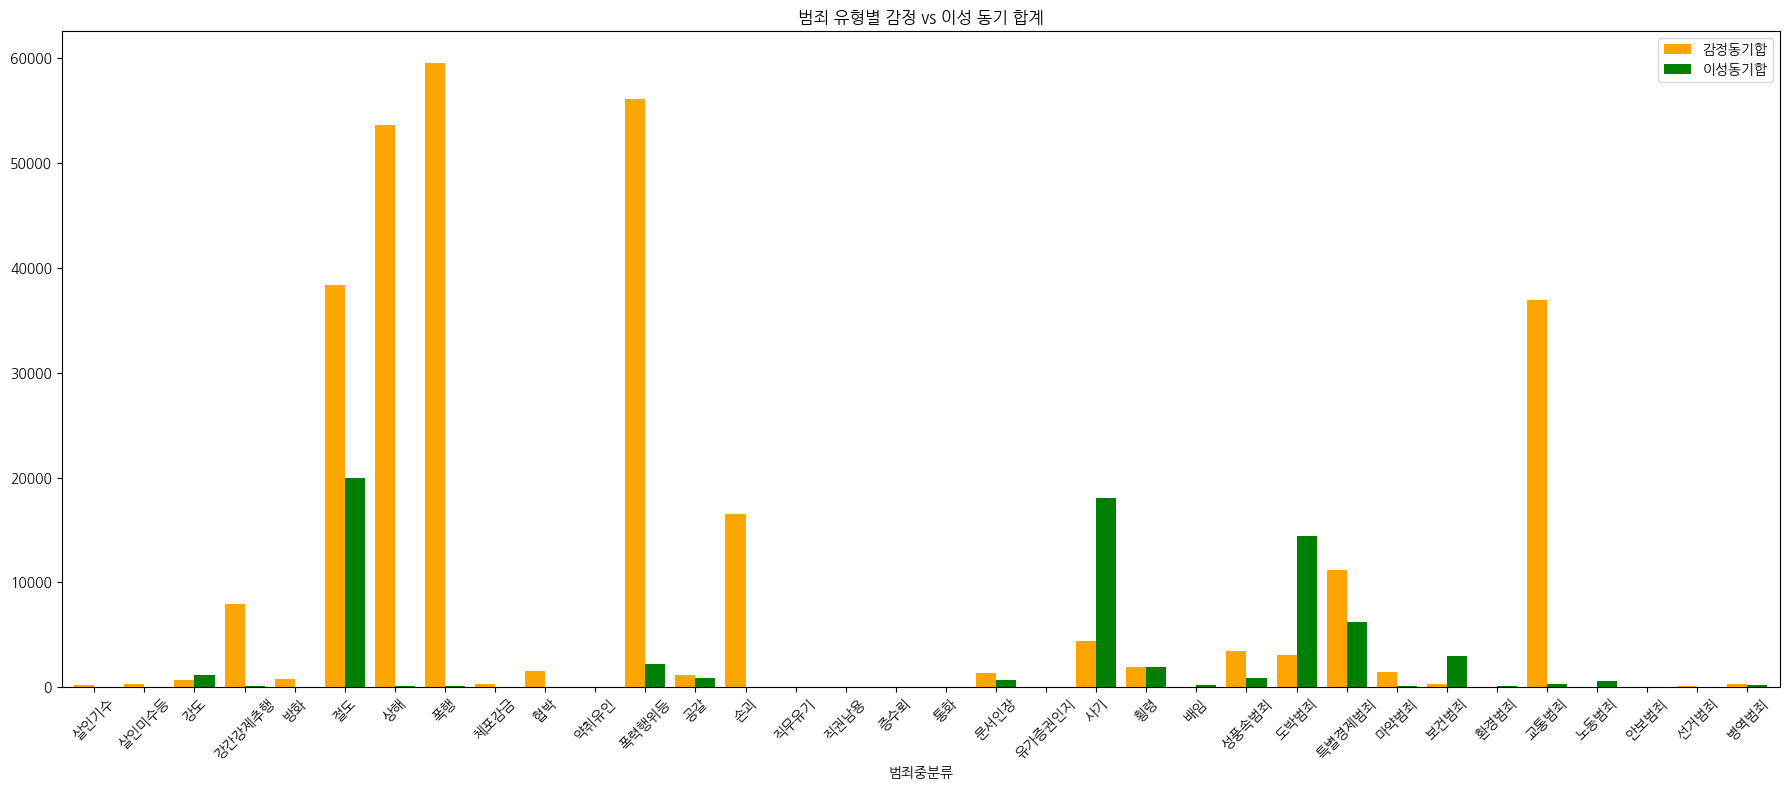

In [ ]:
감정요인 = ['보복', '가정불화', '호기심', '유혹', '우발적', '현실불만']
이성요인 = ['이욕(생활비)', '이욕(유흥비)', '이욕(도박)', '이욕(허영심)', '이욕(치부)', '사행심']

감정결과 = []
이성결과 = []
범죄명 = []

for i, row in motive.iterrows():
    범죄 = row['범죄중분류']
    감정합 = sum([int(row[col]) for col in 감정요인 if col in row])
    이성합 = sum([int(row[col]) for col in 이성요인 if col in row])

    감정결과.append(감정합)
    이성결과.append(이성합)
    범죄명.append(범죄)

# 데이터프레임으로 변환
감정이성 = pd.DataFrame({
    '범죄중분류': 범죄명,
    '감정동기합': 감정결과,
    '이성동기합': 이성결과
})

# 비율 시각화
감정이성.set_index('범죄중분류')[['감정동기합', '이성동기합']].plot(kind='bar', figsize=(18,8), color=['orange', 'green'], width=0.8, title='범죄 유형별 감정 vs 이성 동기 합계')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
